In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from IPython.display import Image, display

In [0]:
from keras.preprocessing import image, sequence
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import ResNet50

In [0]:
from keras.models import model_from_json

In [51]:
pd_dataset = pd.read_csv("flickr_8k_train_dataset.txt", delimiter='\t')
ds = pd_dataset.values
print (ds.shape)

(30000, 2)


In [52]:
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print (len(sentences))

30000


In [0]:
words = [i.split() for i in sentences]

In [0]:
unique = []
for i in words:
    unique.extend(i)

In [55]:
unique = list(set(unique))
print (len(unique))

vocab_size = len(unique)

8253


In [0]:
#Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [0]:
embedding_size = 128
max_len = 40

In [58]:
#load model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 40, 128)      1056512     input_4[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 128)          262272      input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LS

In [0]:
# load weights into new model
model.load_weights("model_weights1024w3.h5")

In [0]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [0]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [62]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3), pooling = 'avg')
resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
img = "Flicker8k_Dataset/146098876_0d99d7fb98.jpg"
#img = "Flicker8k_Dataset/1394368714_3bc7c19969.jpg"

test_img = get_encoding(resnet, img)

In [0]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

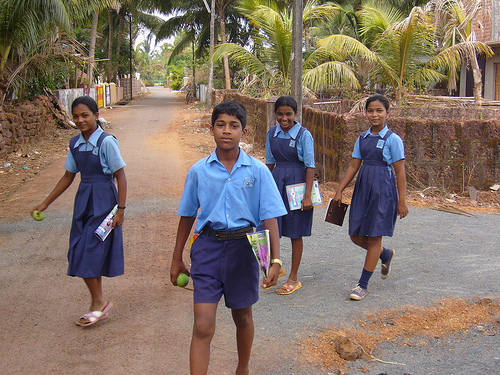

buggy attempt buggy objest tucking artifacts flock dirty tucking prey lock tie tie tie tie tie tie lock tie tie tie tie tie tie tie tie tie tie lock tie tie tie tie tie tie tie tie tie tie


In [77]:
z = Image(filename=img)
display(z)

print (Argmax_Search)